In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (train_test_split, 
                                     cross_val_score,
                                     GridSearchCV)
from sklearn.metrics import (classification_report,
                            accuracy_score,
                            confusion_matrix,
                            roc_curve,
                            roc_auc_score,
                            precision_recall_curve, 
                            average_precision_score)


In [2]:
# Loading dataset

df = pd.read_csv(r"C:\Users\KIIT\Downloads\diabetes.csv")
print(f"The dataset is: \n {df}")

The dataset is: 
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1

In [3]:
# Basic EDA operations:

print(f"The first 5 rows of the dataset: \n {df.head()}")
print(f"The basic information of the dataset: \n {df.info()}")
print(f"The description of percentile of the dataset: \n {df.describe(percentiles=[0.2,0.4,0.6,0.8])}")
print(f"The shape of the dataset: \n {df.shape}")
print(f"The quantile of the dataset: \n {df.select_dtypes(include=['number']).quantile(0.25)}")

The first 5 rows of the dataset: 
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  

In [4]:
# Performing basic statistical operations:
mean = df['Age'].mean()
print(f"The mean of the ages is: \n {mean}")

var = df['Age'].var()
print(f"The variance of the ages is: \n {var}")

std_dev = df['Age'].std()
print(f"The standard deviation of the ages is: \n {std_dev}")

quant = df['Age'].quantile(0.25)
print(f"The quantile of the ages is: \n {quant}")


The mean of the ages is: 
 33.240885416666664
The variance of the ages is: 
 138.30304589037365
The standard deviation of the ages is: 
 11.76023154067868
The quantile of the ages is: 
 24.0


In [5]:
# Seperating the dataset into Dependent and independnent

X = df.drop('Outcome', axis=1)  # Independent variables
y = df['Outcome']     # Dependent variable


In [6]:
# Splitting the datset into test and train data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)
print("The training data: \n")
print(X_train)
print (y_train)
print("The test data: \n")
print(X_test)
print(y_test)

The training data: 

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
727            0      141             84             26        0  32.4   
423            2      115             64             22        0  30.8   
179            5      130             82              0        0  39.1   
304            3      150             76              0        0  21.0   
398            3       82             70              0        0  21.1   
..           ...      ...            ...            ...      ...   ...   
71             5      139             64             35      140  28.6   
106            1       96            122              0        0  22.4   
270           10      101             86             37        0  45.6   
435            0      141              0              0        0  42.4   
102            0      125             96              0        0  22.5   

     DiabetesPedigreeFunction  Age  
727                     0.433   22  
423             

In [7]:
# Initialize and train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Model Training on Data

y_pred_train = rf.predict(X_train)
print(f"The dependent train data is: \n {y_pred_train}")


The dependent train data is: 
 [0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0
 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0
 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1
 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1
 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0
 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0
 0 1 0 1 0 0 1 0 0 0 0 1 1 0]


In [9]:
# Model Testing on Data

y_pred_test = rf.predict(X_test)
print(f"The dependent test data is: \n {y_pred_test}")

The dependent test data is: 
 [0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0
 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1
 0 0 1 1 1 0 1 1 0 0 0 1 1 1]


In [10]:
# Using Hyperparameter tuning

print("Hyperparameter tuning with GridSearchCV")
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

# Train the model with the best parameters

best_rf = grid_search.best_estimator_

# Predict on test set with the best model

y_pred_best = best_rf.predict(X_test)
print(y_pred_best)


Hyperparameter tuning with GridSearchCV
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
[0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1
 0 0 1 1 1 0 1 1 0 0 1 1 1 1]


Best Model Accuracy: 0.765625
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       254
           1       0.65      0.65      0.65       130

    accuracy                           0.77       384
   macro avg       0.74      0.74      0.74       384
weighted avg       0.77      0.77      0.77       384



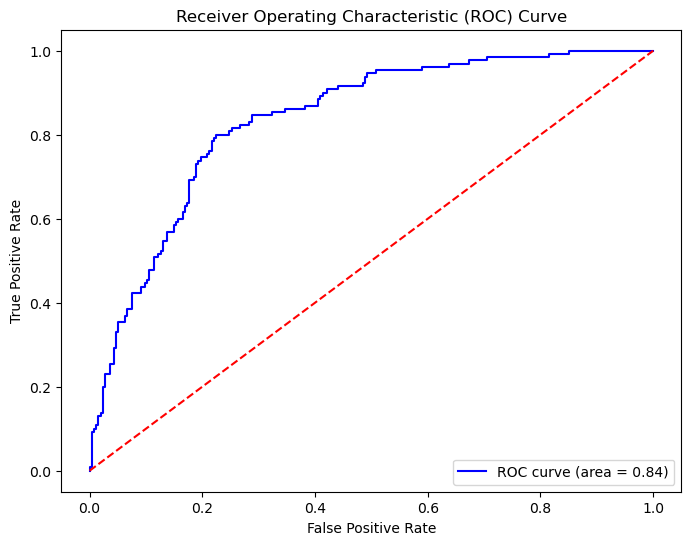

Feature ranking:
1. Feature Glucose (0.2803)
2. Feature BMI (0.1753)
3. Feature Age (0.1410)
4. Feature DiabetesPedigreeFunction (0.1050)
5. Feature Insulin (0.0772)
6. Feature BloodPressure (0.0765)
7. Feature Pregnancies (0.0763)
8. Feature SkinThickness (0.0683)


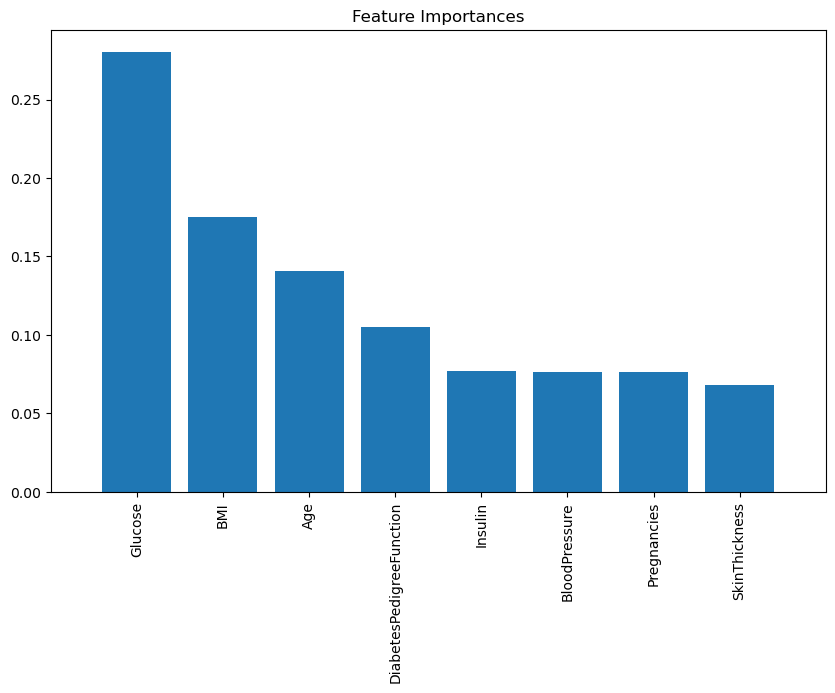

In [11]:
# Evaluate performance of the best model

print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))

# Plot ROC curve

fpr, tpr, thresholds = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Feature importance   
 
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking

print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {X.columns[indices[f]]} ({importances[indices[f]]:.4f})")
    
# Plot feature importances

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


The Accuaracy of the model: 1.0
The classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       246
           1       1.00      1.00      1.00       138

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384

(array([0.359375, 1.      , 1.      ]), array([1., 1., 0.]), array([0, 1], dtype=int64))
Precision-Recall AUC: 1.0
[0.74025974 0.74675325 0.75974026 0.83660131 0.75163399]


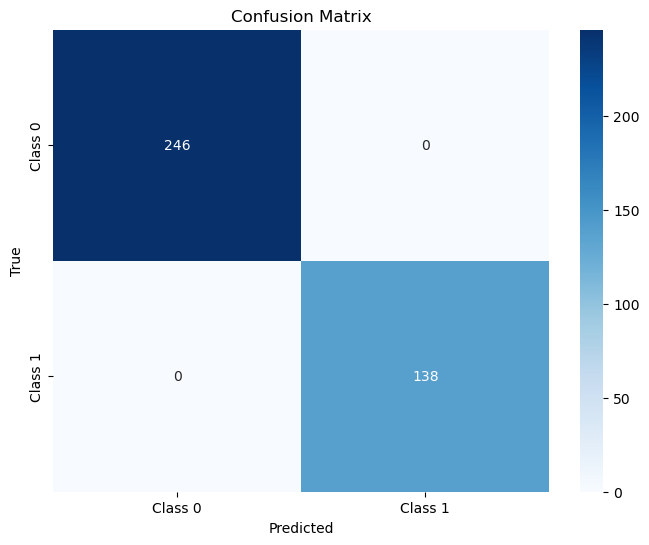

In [12]:
# Model Evaluation on training data

print(f"The Accuaracy of the model: {accuracy_score(y_train, y_pred_train)}")
print(f"The classification report: \n {classification_report(y_train, y_pred_train)}")

print(precision_recall_curve(y_train, y_pred_train))
print("Precision-Recall AUC:", average_precision_score(y_train, y_pred_train))
print(cross_val_score(rf, X, y, cv=5, scoring='accuracy'))

# Plot confusion matrix

cm = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

The Accuaracy of the model: 0.7682291666666666
The classification report: 
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       254
           1       0.65      0.67      0.66       130

    accuracy                           0.77       384
   macro avg       0.74      0.74      0.74       384
weighted avg       0.77      0.77      0.77       384

(array([0.33854167, 0.65413534, 1.        ]), array([1.        , 0.66923077, 0.        ]), array([0, 1], dtype=int64))
Precision-Recall AUC: 0.5497466623288991
[0.74025974 0.74675325 0.75974026 0.83660131 0.75163399]


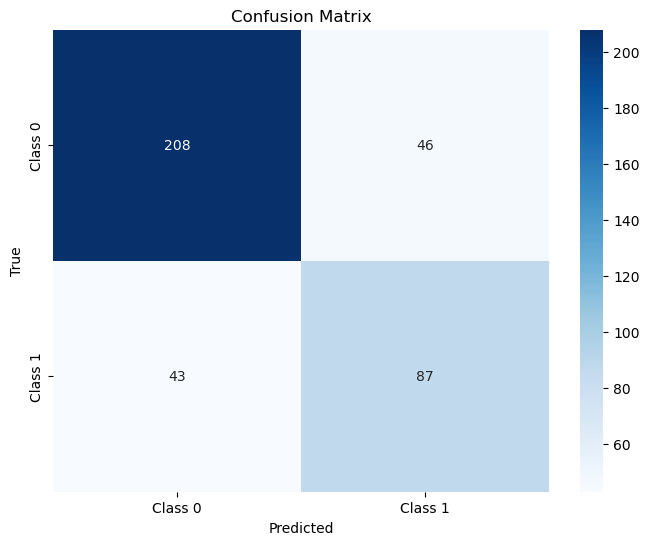

In [13]:
# Model Evaluation on test data

print(f"The Accuaracy of the model: {accuracy_score(y_test, y_pred_test)}")
print(f"The classification report: \n {classification_report(y_test, y_pred_test)}")

print(precision_recall_curve(y_test, y_pred_test))
print("Precision-Recall AUC:", average_precision_score(y_test, y_pred_test))
print(cross_val_score(rf, X, y, cv=5, scoring='accuracy'))

# Plot confusion matrix

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [14]:
# Compute correlation matrix for numeric columns using the DataFrame X_train

correlation_matrix = X_train.corr()
threshold = 0  # Lower the threshold to see more correlated pairs
high_corr_indices = np.where(np.abs(correlation_matrix) > threshold)
high_corr_features = [
    (correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y])
    for x, y in zip(*high_corr_indices) if x != y
]
for feat1, feat2, corr in high_corr_features:
    print(f"{feat1} - {feat2}: {corr:.2f}")


Pregnancies - Glucose: 0.15
Pregnancies - BloodPressure: 0.17
Pregnancies - SkinThickness: -0.02
Pregnancies - Insulin: -0.07
Pregnancies - BMI: 0.06
Pregnancies - DiabetesPedigreeFunction: 0.01
Pregnancies - Age: 0.57
Glucose - Pregnancies: 0.15
Glucose - BloodPressure: 0.14
Glucose - SkinThickness: 0.03
Glucose - Insulin: 0.35
Glucose - BMI: 0.20
Glucose - DiabetesPedigreeFunction: 0.16
Glucose - Age: 0.26
BloodPressure - Pregnancies: 0.17
BloodPressure - Glucose: 0.14
BloodPressure - SkinThickness: 0.10
BloodPressure - Insulin: -0.01
BloodPressure - BMI: 0.23
BloodPressure - DiabetesPedigreeFunction: 0.07
BloodPressure - Age: 0.29
SkinThickness - Pregnancies: -0.02
SkinThickness - Glucose: 0.03
SkinThickness - BloodPressure: 0.10
SkinThickness - Insulin: 0.41
SkinThickness - BMI: 0.35
SkinThickness - DiabetesPedigreeFunction: 0.19
SkinThickness - Age: -0.12
Insulin - Pregnancies: -0.07
Insulin - Glucose: 0.35
Insulin - BloodPressure: -0.01
Insulin - SkinThickness: 0.41
Insulin - BMI

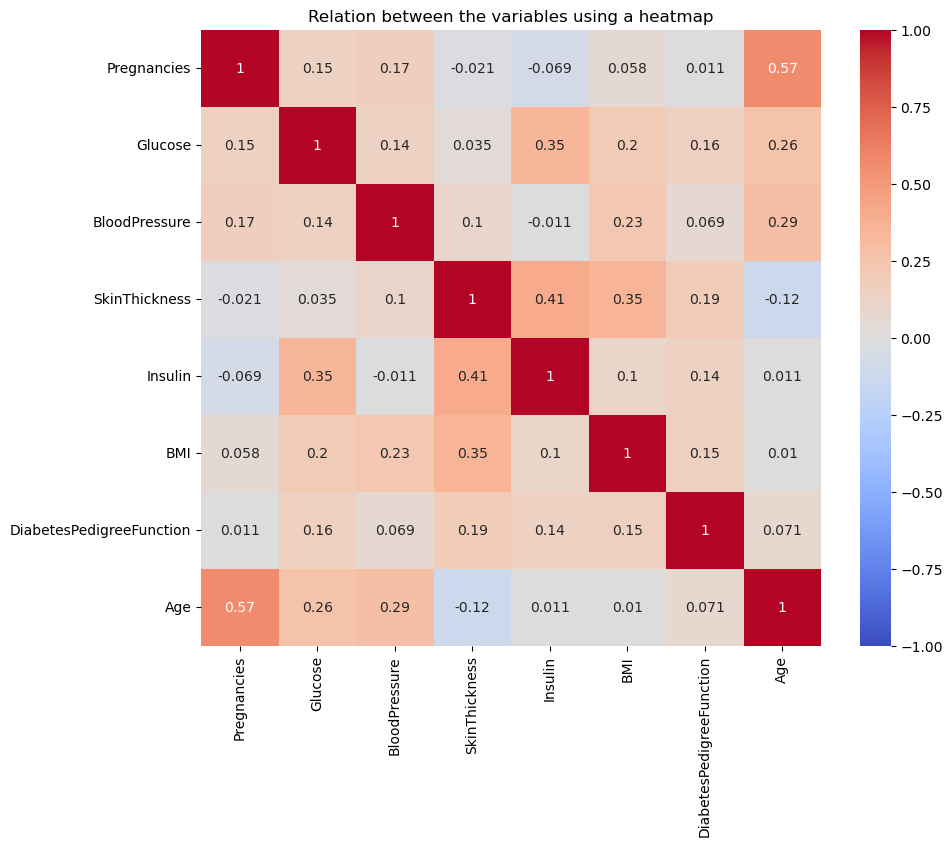

In [15]:
# Visualize correlation matrix for selected features

plt.figure(figsize=(10, 8))
mask = abs(correlation_matrix) > threshold
sns.heatmap(correlation_matrix.where(mask), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Relation between the variables using a heatmap')
plt.show()

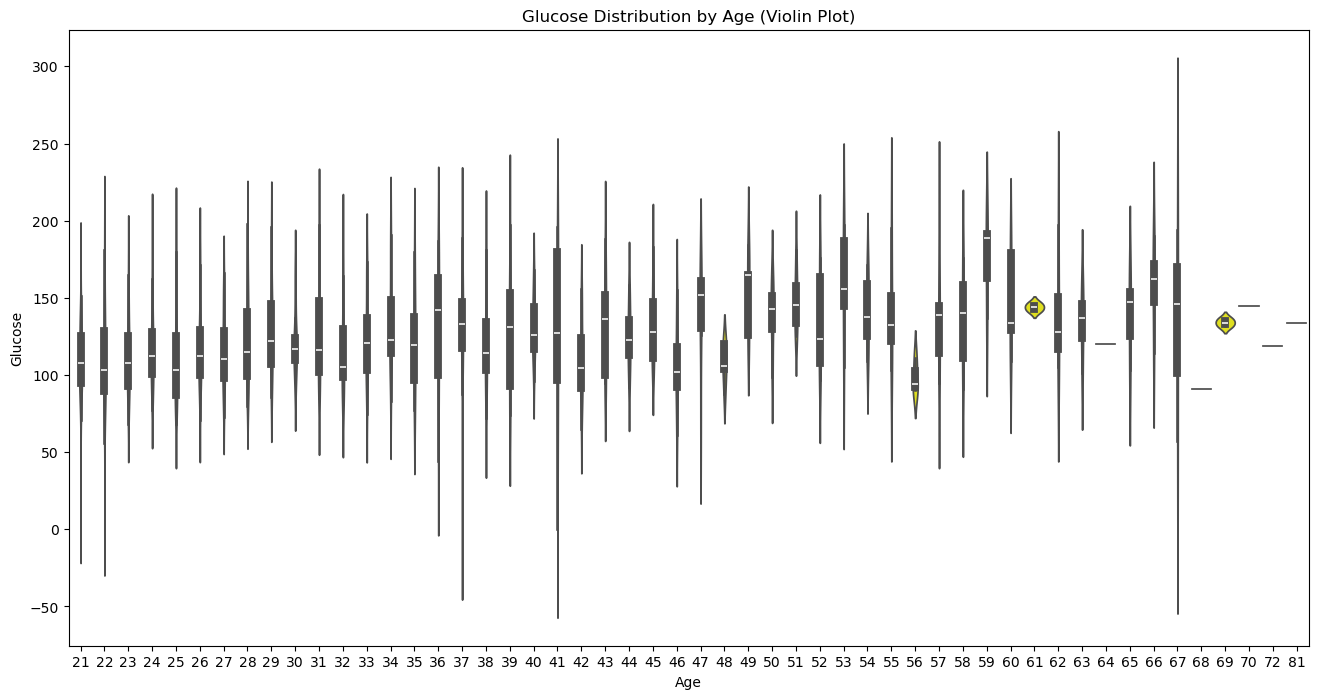

In [16]:
# Plotting violin plot using the original DataFrame

plt.figure(figsize = (16,8))
sns.violinplot(x='Age', y='Glucose', data=df, inner='box', color='yellow', saturation=0.75)
plt.title('Glucose Distribution by Age (Violin Plot)')
plt.show()

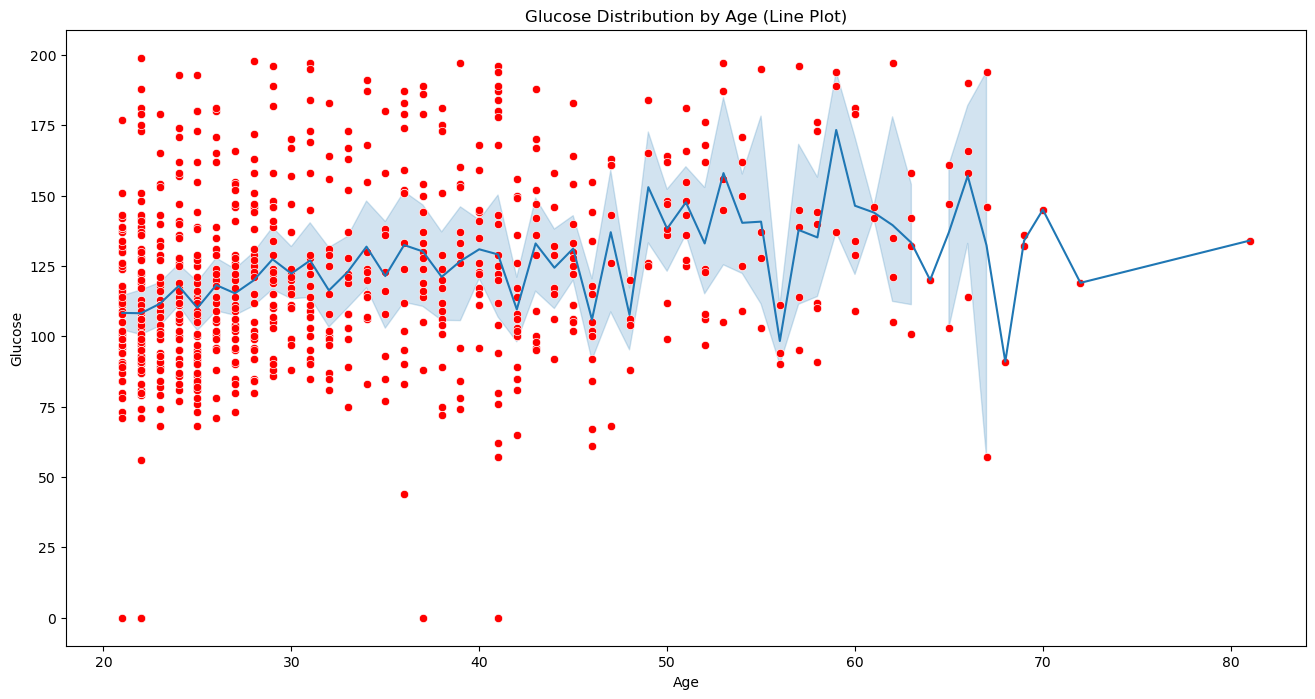

In [17]:
# Plotting a line plot for visualization using original dataframe

plt.figure(figsize = (16,8))
sns.lineplot(x = 'Age', y = 'Glucose', data = df)
sns.scatterplot(x='Age', y='Glucose', data=df, color='red')
plt.title('Glucose Distribution by Age (Line Plot)')
plt.show()

In [18]:
# Outlier detection using IQR

df=np.random.normal(loc=0,size=100,scale=1)
len(df), df

Q1=np.percentile(df,25)
Q3=np.percentile(df,75)
IQR=Q3-Q1
print(IQR)

1.4337883592999376


In [19]:
# Calculate upper and lower boundaries for outliers

lower_boundary = Q1 - 1.5 * IQR
upper_boundary = Q3 + 1.5 * IQR

print("Lower boundary for outliers:", lower_boundary)
print("Upper boundary for outliers:", upper_boundary)

Lower boundary for outliers: -2.823834360619228
Upper boundary for outliers: 2.911319076580523


In [20]:
# Find outliers

outliers = df[(df < lower_boundary) | (df > upper_boundary)]
print("Number of outliers:", len(outliers))
print("Outliers:", outliers)

Number of outliers: 1
Outliers: [3.11448357]


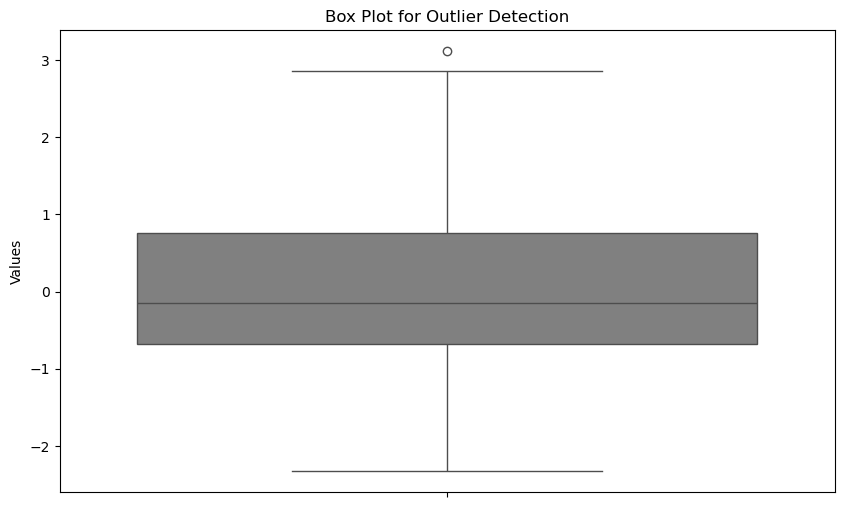

In [21]:
# Create a box plot using seaborn

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, color='grey')
plt.title('Box Plot for Outlier Detection')
plt.ylabel('Values')
plt.show()